# Exploratory Data Analysis (EDA):

Exploratory data analysis (EDA) is used by data scientists to analyze and investigate data sets and summarize their main characteristics, often employing data visualization methods. It helps determine how best to manipulate data sources to get the answers you need, making it easier for data scientists to discover patterns, spot anomalies, test a hypothesis, or check assumptions.

EDA is primarily used to see what data can reveal beyond the formal modeling or hypothesis testing task and provides a provides a better understanding of data set variables and the relationships between them. It can also help determine if the statistical techniques you are considering for data analysis are appropriate.

## Importing the libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter('ignore')

pd.set_option("display.max_columns", None)

## Introduction :

The dataset was released by Aspiring Minds from the Aspiring Mind Employment Outcome 2015 (AMEO). The study is primarily limited  only to students with engineering disciplines. The dataset contains the employment outcomes of engineering graduates as dependent variables (Salary, Job Titles, and Job Locations) along with the standardized scores from three different areas – cognitive skills, technical skills and personality skills. The dataset also contains demographic features. The dataset  contains  around  40 independent variables and 4000 data points. The independent variables are both continuous and categorical in nature. The dataset contains a unique identifier for each candidate. Below mentioned table contains the details for the original dataset.

## Reading the data

In [ ]:
# dataset url --> https://drive.google.com/file/d/1mV_ifvzzrlPWgdSzrwW5ZK-aF3S9tydZ/view

data_df = pd.read_excel('aspiring_minds_employability_outcomes_2015.xlsx') # reading the dataset using pandas

In [ ]:
data_df.head() # first 5 rows

,Unnamed: 0,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,12graduation,12percentage,12board,CollegeID,CollegeTier,Degree,Specialization,collegeGPA,CollegeCityID,CollegeCityTier,CollegeState,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,train,203097,420000,2012-06-01,present,senior quality engineer,Bangalore,f,1990-02-19,84.3,"board ofsecondary education,ap",2007,95.8,"board of intermediate education,ap",1141,2,B.Tech/B.E.,computer engineering,78.00,1141,0,Andhra Pradesh,2011,515,585,525,0.635979,445,-1,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,train,579905,500000,2013-09-01,present,assistant manager,Indore,m,1989-10-04,85.4,cbse,2007,85.0,cbse,5807,2,B.Tech/B.E.,electronics and communication engineering,70.06,5807,0,Madhya Pradesh,2012,695,610,780,0.960603,-1,466,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,train,810601,325000,2014-06-01,present,systems engineer,Chennai,f,1992-08-03,85.0,cbse,2010,68.2,cbse,64,2,B.Tech/B.E.,information technology,70.00,64,0,Uttar Pradesh,2014,615,545,370,0.450877,395,-1,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,train,267447,1100000,2011-07-01,present,senior software engineer,Gurgaon,m,1989-12-05,85.6,cbse,2007,83.6,cbse,6920,1,B.Tech/B.E.,computer engineering,74.64,6920,1,Delhi,2011,635,585,625,0.974396,615,-1,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,train,343523,200000,2014-03-01,2015-03-01 00:00:00,get,Manesar,m,1991-02-27,78.0,cbse,2008,76.8,cbse,11368,2,B.Tech/B.E.,electronics and communication engineering,73.90,11368,0,Uttar Pradesh,2012,545,625,465,0.124502,-1,233,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


In [ ]:
print('The dataset has {} rows and columns {}'.format(data_df.shape[0], data_df.shape[1]))

The dataset has 3998 rows and columns 39


In [ ]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3998 entries, 0 to 3997
Data columns (total 39 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Unnamed: 0             3998 non-null   object        
 1   ID                     3998 non-null   int64         
 2   Salary                 3998 non-null   int64         
 3   DOJ                    3998 non-null   datetime64[ns]
 4   DOL                    3998 non-null   object        
 5   Designation            3998 non-null   object        
 6   JobCity                3998 non-null   object        
 7   Gender                 3998 non-null   object        
 8   DOB                    3998 non-null   datetime64[ns]
 9   10percentage           3998 non-null   float64       
 10  10board                3998 non-null   object        
 11  12graduation           3998 non-null   int64         
 12  12percentage           3998 non-null   float64       
 13  12b

In [ ]:
data_df.describe()

,ID,Salary,10percentage,12graduation,12percentage,CollegeID,CollegeTier,collegeGPA,CollegeCityID,CollegeCityTier,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
count,3.998000e+03,3.998000e+03,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000
mean,6.637945e+05,3.076998e+05,77.925443,2008.087544,74.466366,5156.851426,1.925713,71.486171,5156.851426,0.300400,2012.105803,501.649075,501.598799,513.378189,0.510490,353.102801,95.328414,90.742371,22.974737,16.478739,31.851176,2.683842,-0.037831,0.146496,0.002763,-0.169033,-0.138110
std,3.632182e+05,2.127375e+05,9.850162,1.653599,10.999933,4802.261482,0.262270,8.167338,4802.261482,0.458489,31.857271,104.940021,86.783297,122.302332,0.468671,205.355519,158.241218,175.273083,98.123311,87.585634,104.852845,36.658505,1.028666,0.941782,0.951471,1.007580,1.008075
min,1.124400e+04,3.500000e+04,43.000000,1995.000000,40.000000,2.000000,1.000000,6.450000,2.000000,0.000000,0.000000,180.000000,195.000000,120.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-4.126700,-5.781600,-4.600900,-2.643000,-7.375700
25%,3.342842e+05,1.800000e+05,71.680000,2007.000000,66.000000,494.000000,2.000000,66.407500,494.000000,0.000000,2012.000000,425.000000,445.000000,430.000000,0.342315,295.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-0.713525,-0.287100,-0.604800,-0.868200,-0.669200
50%,6.396000e+05,3.000000e+05,79.150000,2008.000000,74.400000,3879.000000,2.000000,71.720000,3879.000000,0.000000,2013.000000,500.000000,505.000000,515.000000,0.622643,415.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.046400,0.212400,0.091400,-0.234400,-0.094300
75%,9.904800e+05,3.700000e+05,85.670000,2009.000000,82.600000,8818.000000,2.000000,76.327500,8818.000000,1.000000,2014.000000,570.000000,565.000000,595.000000,0.842248,495.000000,233.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.702700,0.812800,0.672000,0.526200,0.502400
max,1.298275e+06,4.000000e+06,97.760000,2013.000000,98.700000,18409.000000,2.000000,99.930000,18409.000000,1.000000,2017.000000,875.000000,795.000000,900.000000,0.999910,840.000000,612.000000,715.000000,623.000000,676.000000,548.000000,516.000000,1.995300,1.904800,2.535400,3.352500,1.822400


## Data Cleaning and Preparation

The first step to analyse any dataset is to clean and prepare the data. Some of the steps involved are

* Handling missing values.
* Format existing data to make it meaningful for plotting.
* Try to create new columns using existing columns.

In [ ]:
# checking for missing values in the dataset

data_df.isna().sum()

Unnamed: 0               0
ID                       0
Salary                   0
DOJ                      0
DOL                      0
Designation              0
JobCity                  0
Gender                   0
DOB                      0
10percentage             0
10board                  0
12graduation             0
12percentage             0
12board                  0
CollegeID                0
CollegeTier              0
Degree                   0
Specialization           0
collegeGPA               0
CollegeCityID            0
CollegeCityTier          0
CollegeState             0
GraduationYear           0
English                  0
Logical                  0
Quant                    0
Domain                   0
ComputerProgramming      0
ElectronicsAndSemicon    0
ComputerScience          0
MechanicalEngg           0
ElectricalEngg           0
TelecomEngg              0
CivilEngg                0
conscientiousness        0
agreeableness            0
extraversion             0
n

We can see that there are no missing values present in the dataset. 

But from the dataset description we can come to know that the missing value are represented as 0 and -1.

So we must also check that before visualizing the data.

In [ ]:
# checking for 0's in the dataset

(data_df == 0).astype(int).sum(axis = 0)

Unnamed: 0                  0
ID                          0
Salary                      0
DOJ                         0
DOL                         0
Designation                 0
JobCity                     0
Gender                      0
DOB                         0
10percentage                0
10board                   350
12graduation                0
12percentage                0
12board                   359
CollegeID                   0
CollegeTier                 0
Degree                      0
Specialization              0
collegeGPA                  0
CollegeCityID               0
CollegeCityTier          2797
CollegeState                0
GraduationYear              1
English                     0
Logical                     0
Quant                       0
Domain                      0
ComputerProgramming         0
ElectronicsAndSemicon       0
ComputerScience             0
MechanicalEngg              0
ElectricalEngg              0
TelecomEngg                 0
CivilEngg 

Here we can see that there 0's present in 10board and 12board column which indicates that the value might be an error or missing.

It must be handled.

In [ ]:
# checking for -1 in the data

data_df.isin([-1]).sum()

Unnamed: 0                  0
ID                          0
Salary                      0
DOJ                         0
DOL                         0
Designation                 0
JobCity                   461
Gender                      0
DOB                         0
10percentage                0
10board                     0
12graduation                0
12percentage                0
12board                     0
CollegeID                   0
CollegeTier                 0
Degree                      0
Specialization              0
collegeGPA                  0
CollegeCityID               0
CollegeCityTier             0
CollegeState                0
GraduationYear              0
English                     0
Logical                     0
Quant                       0
Domain                    246
ComputerProgramming       868
ElectronicsAndSemicon    2854
ComputerScience          3096
MechanicalEngg           3763
ElectricalEngg           3837
TelecomEngg              3624
CivilEngg 

Here we can see that there are more -1 values present in the specializations mark column.

The reason might be that a student can have only one specialization leaving others unattended.

### 10board and 12board columns:

Since there are multiple education boards present in India it is difficult to draw insights from it. So we can map them into four categories:
* State : For state boards all over India
* CBSE : For CBSE boards
* ISCE : For ISCE boards
* Unknown : For irregular or missing values.

In [ ]:
data_df['10board'].unique()

array(['board ofsecondary education,ap', 'cbse', 'state board',
       'mp board bhopal', 'icse',
       'karnataka secondary school of examination', 'up',
       'karnataka state education examination board', 'ssc',
       'kerala state technical education', 0, 'bseb',
       'state board of secondary education, andhra pradesh',
       'matriculation', 'gujarat state board', 'karnataka state board',
       'wbbse', 'maharashtra state board', 'icse board', 'up board',
       'board of secondary education(bse) orissa',
       'little jacky matric higher secondary school',
       'uttar pradesh board', 'bsc,orissa', 'mp board', 'upboard',
       'matriculation board', 'j & k bord', 'rbse',
       'central board of secondary education', 'pseb', 'jkbose',
       'haryana board of school education,(hbse)', 'metric', 'ms board',
       'kseeb', 'stateboard', 'maticulation',
       'karnataka secondory education board', 'mumbai board', 'sslc',
       'kseb', 'board secondary  education', 'mat

In [ ]:
cbse_board = ['cbse', 
       'all india board', 
       'central board of secondary education, new delhi', 'cbese'] # list of all boards related to cbse

for board in cbse_board: # replacing the values present in the dataframe
    data_df['10board'].replace(board, 'cbse', inplace = True)
    data_df['12board'].replace(board, 'cbse', inplace = True)

In [ ]:
isce_board = ['isc', 'icse', 'isc board', 'isce', 'cicse',
       'isc board , new delhi'] # list of all boards related to isce

for board in isce_board: # replacing the values present in the dataframe
    data_df['10board'].replace(board, 'isce', inplace = True)
    data_df['12board'].replace(board, 'isce', inplace = True)

In [ ]:
# for state boards i.e boards not in cbse and isce

for board in data_df['10board']:
    if((board not in cbse_board) and (board not in isce_board) and (board != 0)):
        data_df['10board'].replace(board, 'state', inplace = True)
        
for board in data_df['12board']:
    if((board not in cbse_board) and (board not in isce_board) and (board != 0)):
        data_df['12board'].replace(board, 'state', inplace = True)

In [ ]:
# replacing the 0's in the dataframe to a new category unknown

data_df['10board'].replace(0, 'unknown', inplace = True)
data_df['12board'].replace(0, 'unknown', inplace = True)

### Specialization:

Since there are numerous number of specializations we can map similar specializations into a single category.

In [ ]:
data_df['Specialization'].value_counts()

electronics and communication engineering      880
computer science & engineering                 744
information technology                         660
computer engineering                           600
computer application                           244
mechanical engineering                         201
electronics and electrical engineering         196
electronics & telecommunications               121
electrical engineering                          82
electronics & instrumentation eng               32
civil engineering                               29
electronics and instrumentation engineering     27
information science engineering                 27
instrumentation and control engineering         20
electronics engineering                         19
biotechnology                                   15
other                                           13
industrial & production engineering             10
chemical engineering                             9
applied electronics and instrum

In [ ]:
# creating a dictionary to map all the specializations

specialization_dict = {
    'electronics and communication engineering' : 'ECE',
    'computer science & engineering' : 'CSE', 'information technology' : 'CSE', 
    'computer engineering' : 'CSE', 'computer application' : 'CSE',
    'mechanical engineering' : 'MECH', 'electronics and electrical engineering' : 'ECE', 
    'electronics & telecommunications' : 'ECE', 'electrical engineering' : 'ECE',                 
    'electronics & instrumentation eng' : 'ECE', 'civil engineering' : 'CIV',
    'information science engineering' : 'CSE', 'electronics and instrumentation engineering' : 'ECE',
    'instrumentation and control engineering' : 'MECH', 'electronics engineering' : 'ECE',                     
    'biotechnology' : 'Other', 'other' : 'Other',  'industrial & production engineering' : 'MECH',                
    'chemical engineering' : 'Other','applied electronics and instrumentation' : 'ECE', 
    'telecommunication engineering' : 'ECE', 'computer science and technology' : 'CSE', 
    'automobile/automotive engineering' : 'MECH', 'mechanical and automation' : 'MECH', 
    'instrumentation engineering' : 'Other', 'mechatronics' : 'Other',                     
    'electronics and computer engineering' : 'ECE', 'aeronautical engineering' : 'Other',                          
    'industrial engineering' : 'Other', 'computer science' : 'CSE', 'biomedical engineering' : 'Other',                           
    'metallurgical engineering' : 'Other', 'electrical and power engineering' : 'ECE',
    'information & communication technology' : 'CSE', 'embedded systems technology' : 'Other', 
    'power systems and automation': 'Other', 'ceramic engineering' : 'Other', 
    'control and instrumentation engineering' : 'Other', 'information science' : 'CSE',                               
    'computer networking' : 'CSE', 'computer and communication engineering' : 'CSE', 
    'internal combustion engine' : 'Other', 'electronics' : 'ECE', 'mechanical & production engineering' : 'MECH', 
    'industrial & management engineering' : 'Other', 'polymer technology' : 'Other'            
}

In [ ]:
# mappng the Specialization column with the values present in specialization_dict

data_df['Specialization'] = data_df['Specialization'].map(specialization_dict)
data_df['Specialization'].value_counts()

CSE      2288
ECE      1378
MECH      242
Other      61
CIV        29
Name: Specialization, dtype: int64

### JobCity:

In this column we have a null value represented as -1. It must be handled before doing any analysis.

In [ ]:
data_df['JobCity'].unique()[:20] # subset of the unique values in the JobCity column

array(['Bangalore', 'Indore', 'Chennai', 'Gurgaon', 'Manesar',
       'Hyderabad', 'Banglore', 'Noida', 'Kolkata', 'Pune', -1, 'mohali',
       'Jhansi', 'Delhi', 'Hyderabad ', 'Bangalore ', 'noida', 'delhi',
       'Bhubaneswar', 'Navi Mumbai'], dtype=object)

In [ ]:
data_df['JobCity'].replace(-1, 'Unknown', inplace = True) # replacing -1 with a new category Unkown

In [ ]:
data_df['JobCity'] = data_df['JobCity'].str.title() # converting all the values to a uniform representation format
data_df['JobCity']

0              Bangalore
1                 Indore
2                Chennai
3                Gurgaon
4                Manesar
              ...       
3993          New Delhi 
3994           Hyderabad
3995           Bangalore
3996    Asifabadbanglore
3997             Chennai
Name: JobCity, Length: 3998, dtype: object

In [ ]:
# stripping off the leading and trailing empty spaces in the all the values.

data_df['JobCity'] = data_df['JobCity'].apply(lambda x:x.rstrip(' ').lstrip(' '))

In [ ]:
# since there are two value Delhi and New Delhi
# they can be represented as New Delhi

data_df['JobCity'].replace('Delhi', 'New Delhi', inplace = True) 

# since there are three values representing Bangalore
# they can be mapped as a single value
data_df['JobCity'].replace(['Bengaluru', 'Banglore'], 'Bangalore', inplace = True)

###  Date Of Leaving ( DOL ):

In [ ]:
data_df['DOL'].unique()[:10] # subset of the DOL column

array(['present', datetime.datetime(2015, 3, 1, 0, 0),
       datetime.datetime(2015, 5, 1, 0, 0),
       datetime.datetime(2015, 7, 1, 0, 0),
       datetime.datetime(2015, 4, 1, 0, 0),
       datetime.datetime(2014, 10, 1, 0, 0),
       datetime.datetime(2014, 9, 1, 0, 0),
       datetime.datetime(2014, 6, 1, 0, 0),
       datetime.datetime(2012, 9, 1, 0, 0),
       datetime.datetime(2013, 12, 1, 0, 0)], dtype=object)

In [ ]:
# Since this is a dataset from 2015 we can replace the present value with '2015-01-01'

data_df['DOL'].replace('present', '2015-01-01', inplace = True) # replacing the present value
data_df['DOL'] = pd.to_datetime(data_df['DOL']) # changing the datatype to datetime

### Number of years worked:

We can create a new column number of years worked by finding the difference between the Date of Leaving and Date of joining column values and converting it to years.

In [ ]:
data_df['years_worked'] = round((data_df['DOL'] - data_df['DOJ'])/np.timedelta64(1, 'Y'), 1)
data_df['years_worked']

0       2.6
1       1.3
2       0.6
3       3.5
4       1.0
       ... 
3993    1.0
3994    0.0
3995    1.5
3996    0.5
3997    1.9
Name: years_worked, Length: 3998, dtype: float64

### Age of the Candidate when joining and leaving the company:

We can find the age of the candidate when joining and leaving the company by using the DOB, DOJ, DOL.

In [ ]:
# finding the difference between DOJ and DOB and dividing it by 365

data_df['Joining_age'] = round(((data_df['DOJ'] - data_df['DOB']).dt.days)/365).astype(int)
data_df['Joining_age']

0       22
1       24
2       22
3       22
4       23
        ..
3993    24
3994    21
3995    22
3996    22
3997    22
Name: Joining_age, Length: 3998, dtype: int32

In [ ]:
# finding the difference between DOL and DOB and dividing it by 365

data_df['Leaving_age'] = round(((data_df['DOL'] - data_df['DOB']).dt.days)/365).astype(int)
data_df['Leaving_age']

0       25
1       25
2       22
3       25
4       24
        ..
3993    25
3994    21
3995    24
3996    23
3997    24
Name: Leaving_age, Length: 3998, dtype: int32

In [ ]:
data_df['Joining_age'].value_counts()[-5:]

19    3
32    1
30    1
12    1
0     1
Name: Joining_age, dtype: int64

In [ ]:
sorted(list(data_df['Leaving_age'].unique()))

[18, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 35]

In [ ]:
sorted(list(data_df['Joining_age'].unique()))

[0, 12, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 32]

In [ ]:
join_age_idx = data_df[data_df['Joining_age'] <= 12].index # getting the index values where joining age is less than 18

In [ ]:
join_age_idx

Int64Index([1189, 2853], dtype='int64')

In [ ]:
# dropping the row with the index in join_age_idx

data_df.drop(index = join_age_idx, inplace = True)

### Designation and Gender:

In [ ]:
# mapping m --> Male
# f --> Female
# in the Gender column

data_df['Gender'] = data_df['Gender'].map({'m' : 'Male',
                      'f' : 'Female'})

data_df['Designation'] = data_df['Designation'].str.title()

In [ ]:
# dropping the unwanted column

data_df.drop(['Unnamed: 0', 'DOJ', 'DOL', 'DOB',
             'CollegeID', 'CollegeCityID'], axis = 1, inplace = True)

## Univariate Analysis:

In [ ]:
# setting the theme of the plots gloabally

sns.set_theme(style = 'darkgrid', context = 'poster', color_codes = True,
             font_scale = 0.75)

### Salary:

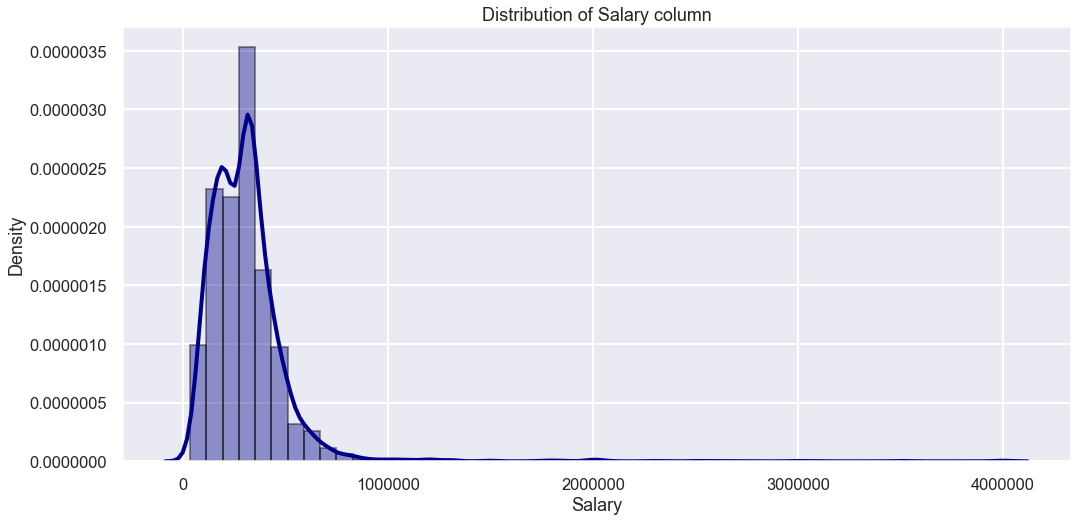

In [ ]:
plt.figure(figsize = (17, 8)) # setting the figure size

# distplot of the Salary column
sns.distplot(data_df['Salary'], kde_kws = {'linewidth' : 4}, 
             hist_kws = {'edgecolor' : 'black'}, color = 'darkblue')

plt.ticklabel_format(style = 'plain', axis ='x') # printiing the x-label normally 
plt.ticklabel_format(style = 'plain', axis ='y') # printiing the y-label normally
plt.title('Distribution of Salary column') # title of the plot
plt.show();

__Observation :__

* Here we can see that the distribution of Salary is somewhat in log normal distribution, as it has a longer tail.
* Most of the salary values are concentrated below the range of 90000.

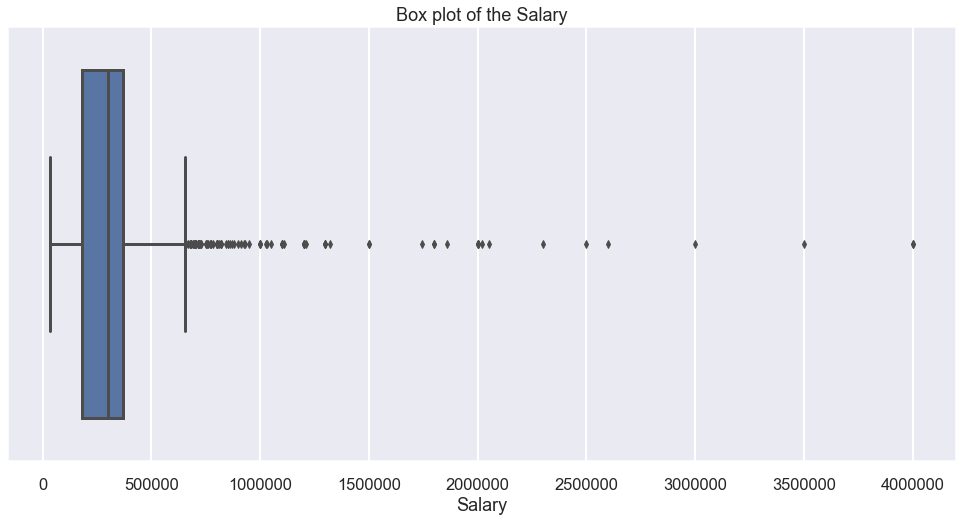

In [ ]:
plt.figure(figsize = (17, 8)) # setting the figure size

# boxplot of salary column
sns.boxplot(data_df['Salary'])

plt.title('Box plot of the Salary')

plt.ticklabel_format(style = 'plain', axis ='x') # printiing the x-label normally 


In [ ]:
data_df[(data_df['Salary'] < data_df['Salary'].quantile(0.25)) | (data_df['Salary'] > data_df['Salary'].quantile(0.75))].shape

(1763, 36)

__Observations:__

* Nearly 44% of the data in salary can be considered as outliers in the dataset.

### 10th Percentage:

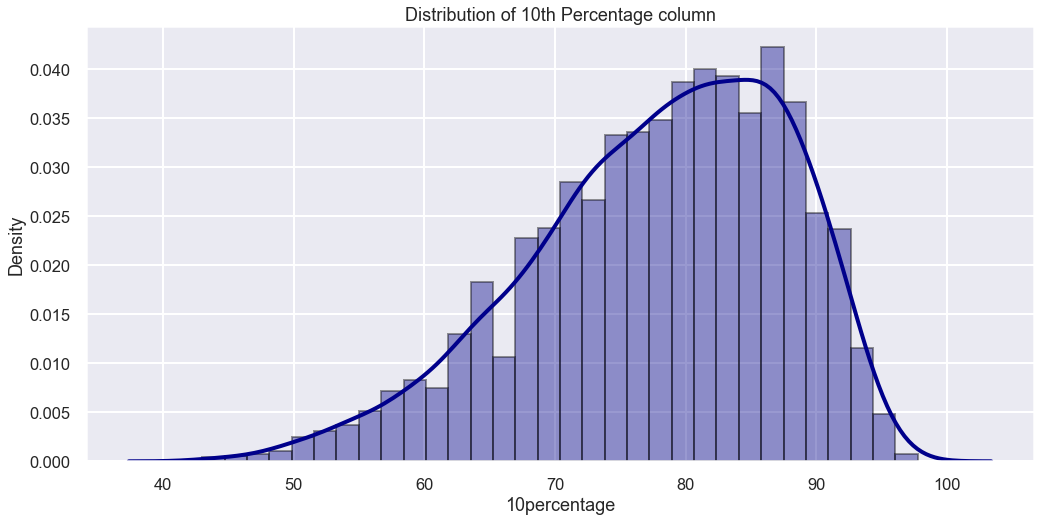

In [ ]:
plt.figure(figsize = (17, 8)) # setting the figure size

# distplot of 10th percentage column
sns.distplot(data_df['10percentage'], kde = True, color = 'darkblue',
             hist_kws = {'edgecolor' : 'black'}, kde_kws = {'linewidth' : 4})

plt.title('Distribution of 10th Percentage column') # title of the plot
plt.show();

__Observations:__

* Here we can that the 10th percentage columm in left skewed as there are more datapoints towards the left side of the plot.

### 12th Percentage:

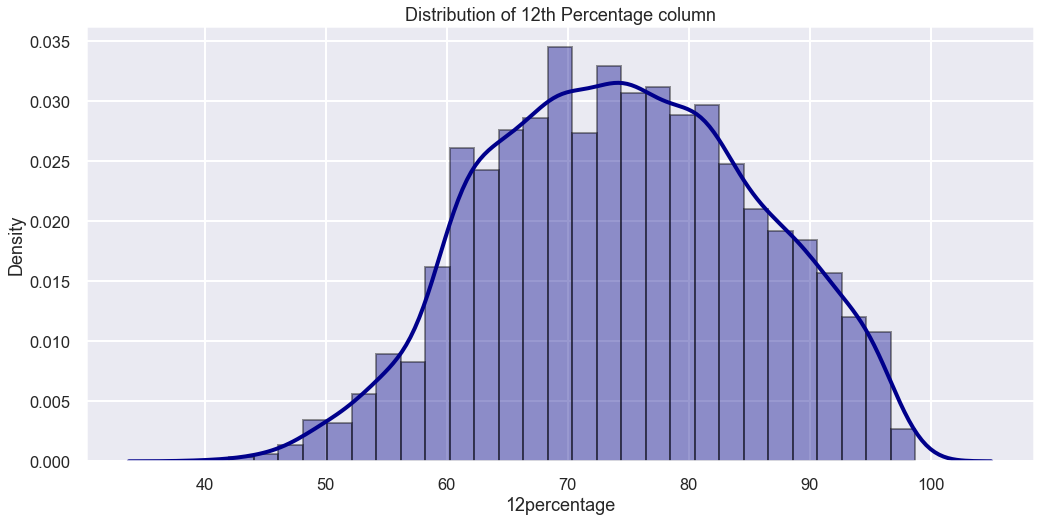

In [ ]:
plt.figure(figsize = (17, 8)) # setting the figure size

# distplot of 12th percentage column
sns.distplot(data_df['12percentage'], kde = True, color = 'darkblue',
             hist_kws = {'edgecolor' : 'black'}, kde_kws = {'linewidth' : 4})

plt.title('Distribution of 12th Percentage column') # title of the plot
plt.show();

__Observation:__

* Here also from the plot we can see that the distribution is negatively skewed.

### College GPA:

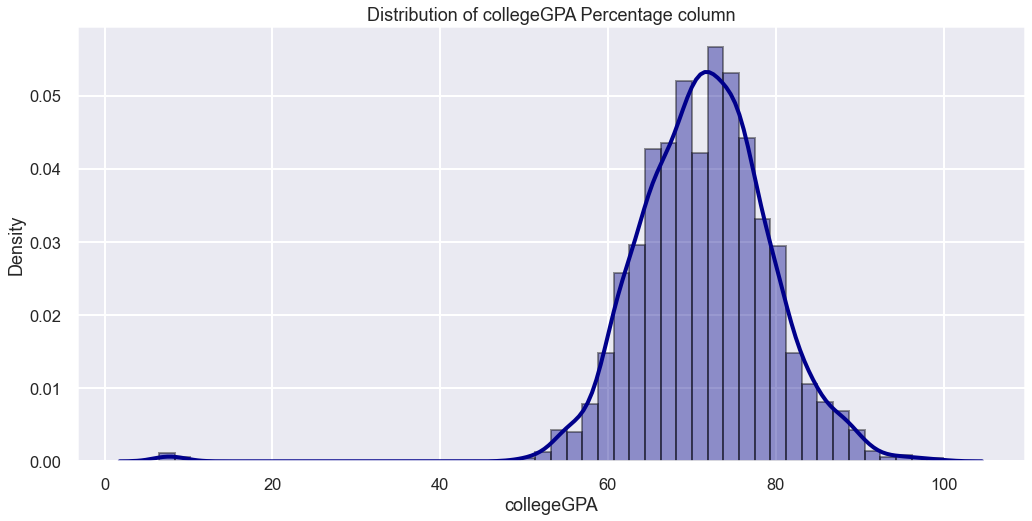

In [ ]:
plt.figure(figsize = (17, 8)) # setting the plot size

# distplot of collegeGPA column
sns.distplot(data_df['collegeGPA'], kde = True, color = 'darkblue',
             hist_kws = {'edgecolor' : 'black'}, kde_kws = {'linewidth' : 4})

plt.title('Distribution of collegeGPA Percentage column') # title of the plot
plt.show();

__Observation:__

* Here also from the plot we can see that the distribution is negatively skewed.
* Nearly 80% of the values are present between 65 and 85.

### Specialization:

Here we can visualize the count of each specialization using count plot.

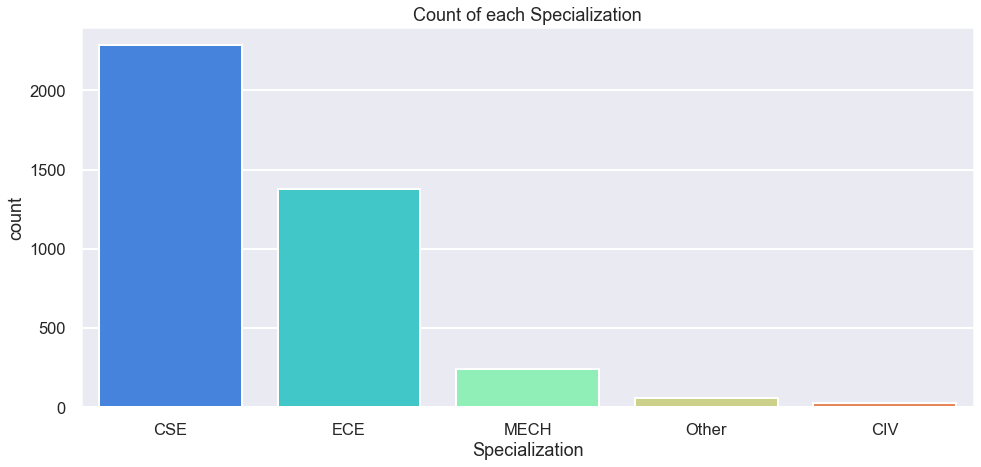

In [ ]:
plt.figure(figsize = (16, 7)) # setting the plot size

# countplot ordered in descending order 
sns.countplot(data_df['Specialization'], order= data_df['Specialization'].value_counts().index,
             palette = 'rainbow')
plt.title('Count of each Specialization') # title of the plot

plt.show();

In [ ]:
cse_ece_total = round(data_df[(data_df['Specialization'] == 'CSE') | (data_df['Specialization'] == 'ECE')].shape[0]/data_df.shape[0], 2)*100

print('The specialization of CSE and ECE both contribure {}% of the total specialization.'.format(cse_ece_total))

The specialization of CSE and ECE both contribure 92.0% of the total specialization.


__Observations:__

* From the plot we can see that most of the students who chose IT as their carrer are mostly from Computer Science or from Electrical background.
* Computer Science and Electrical have a combined 92% of the total specializations.

### Board:

Here we can visualize the counts of respective boards of 10th and 12th Standards.

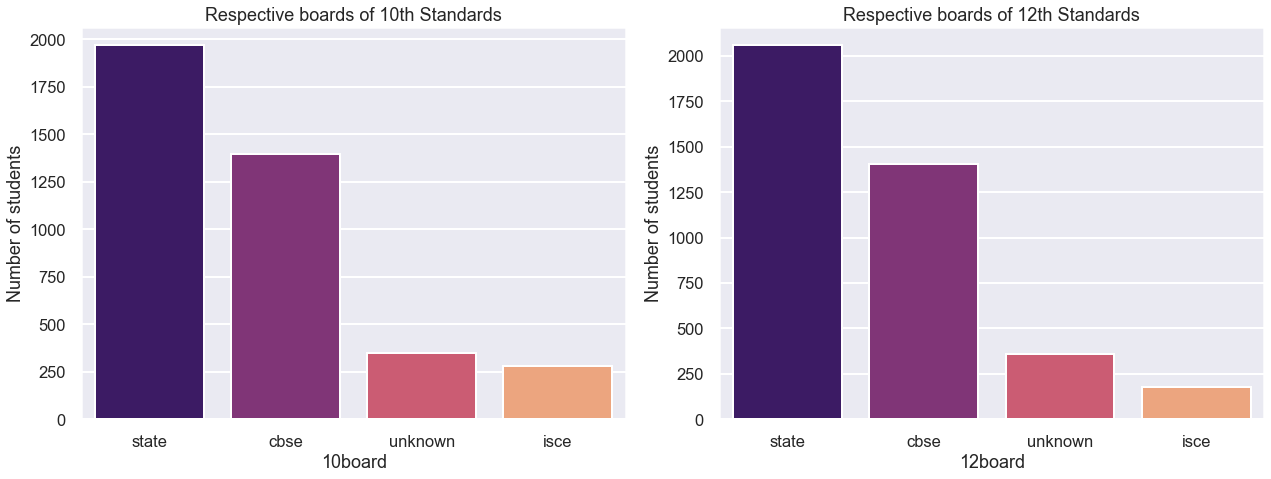

In [ ]:
plt.figure(figsize = (18, 7))

ax1 = plt.subplot(121) # subplot on row - 1 coloum - 1
sns.countplot(data_df['10board'], order = data_df['10board'].value_counts().index,
              palette = 'magma', ax = ax1)

plt.title('Respective boards of 10th Standards')
plt.ylabel('Number of students')

plt.tight_layout()

ax2 = plt.subplot(122) # subplot on row - 1 coloum - 2
sns.countplot(data_df['12board'], order = data_df['12board'].value_counts().index, 
              palette = 'magma', ax = ax2)

plt.title('Respective boards of 12th Standards')
plt.ylabel('Number of students')

plt.tight_layout()

__Observations:__

* Here we can see that majority of the students prefer their education either through state board or cbse.
* There is slight increase in the number of state board in 12th standard. The reason might be that in higher secondary cbse can be tough to prepare compared to state board syllabus.

### Joining and Leaving age:

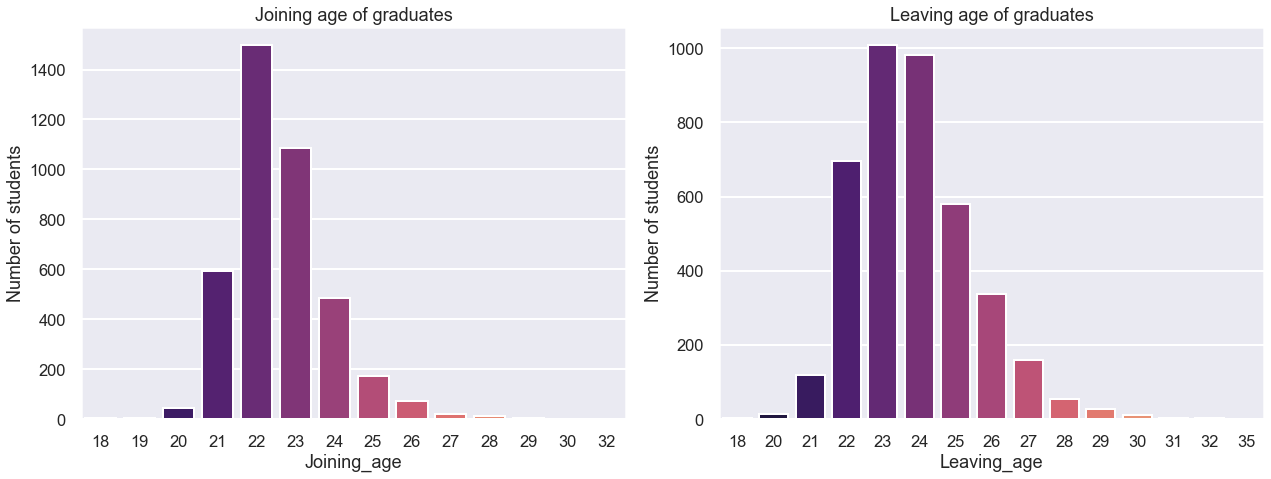

In [ ]:
plt.figure(figsize = (18, 7))

ax1 = plt.subplot(121) # subplot on row - 1 coloum - 1
sns.countplot(data_df['Joining_age'], palette = 'magma', ax = ax1)
              
plt.title('Joining age of graduates')
plt.ylabel('Number of students')

plt.tight_layout()

ax2 = plt.subplot(122) # subplot on row - 1 coloum - 2
sns.countplot(data_df['Leaving_age'], palette = 'magma', ax = ax2)

plt.title('Leaving age of graduates')
plt.ylabel('Number of students')

plt.tight_layout()

__Observations:__

* From the joining age graph we can see that at the age of 22 there are more number of joinings in IT company. That's because students graduate at the age of 22 for their UG degree.
* For the leaving age graph we can see that from the age of 23 the number of employees leaving their jobs is gradually reducing. 

### Job City: 

In [ ]:
data_df['JobCity'].value_counts()

Bangalore                684
Unknown                  461
Noida                    388
Hyderabad                368
Pune                     327
                        ... 
Kurnool                    1
Asansol                    1
Guragaon                   1
New Delhi - Jaisalmer      1
Tirunelvelli               1
Name: JobCity, Length: 229, dtype: int64

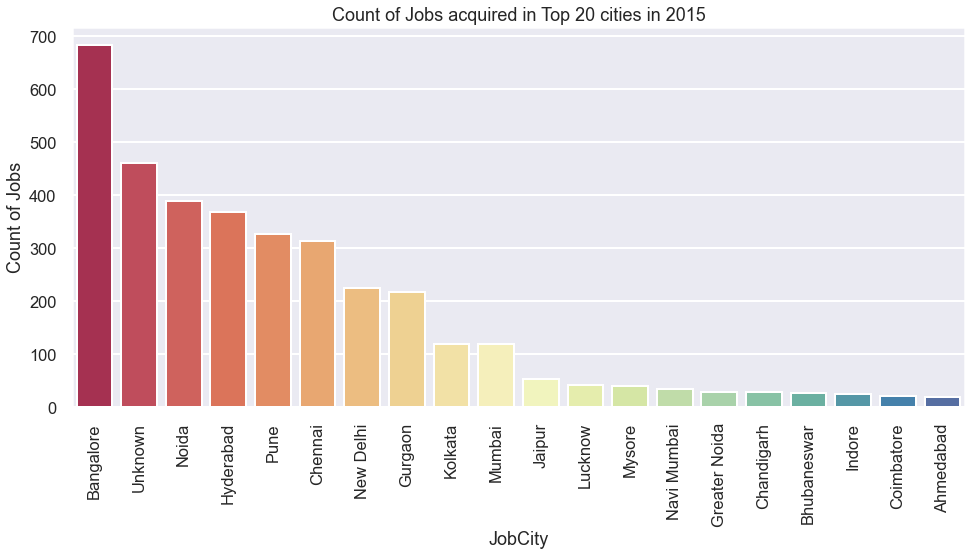

In [ ]:
plt.figure(figsize = (16, 7)) # setting the plot size

# countplot ordered in descending order 
sns.countplot(data_df['JobCity'], order= data_df['JobCity'].value_counts().index[:20],
             palette = 'Spectral')

_ = plt.xticks(rotation = 90) # rotating the x axis

plt.ylabel('Count of Jobs') # setting y label
 
plt.title('Count of Jobs acquired in Top 20 cities in 2015') # title of the plot

plt.show();

__Observations:__

* Here we can see that Banglore, Noida, Hyderabad, Pune, Chennai, New Delhi etc. are some of the top cities to get a job at IT industry.
* There are higher number of jobs in Southern part of India compared to Northern Part of India.

### Distributions of Other numeric columns:

In [ ]:
data_df.columns

Index(['ID', 'Salary', 'Designation', 'JobCity', 'Gender', '10percentage',
       '10board', '12graduation', '12percentage', '12board', 'CollegeTier',
       'Degree', 'Specialization', 'collegeGPA', 'CollegeCityTier',
       'CollegeState', 'GraduationYear', 'English', 'Logical', 'Quant',
       'Domain', 'ComputerProgramming', 'ElectronicsAndSemicon',
       'ComputerScience', 'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg',
       'CivilEngg', 'conscientiousness', 'agreeableness', 'extraversion',
       'nueroticism', 'openess_to_experience', 'years_worked', 'Joining_age',
       'Leaving_age'],
      dtype='object')

In [ ]:
other_numeric_cols = ['English', 'Logical', 'Quant', 'Domain', 'ComputerProgramming',
       'ElectronicsAndSemicon', 'ComputerScience', 'MechanicalEngg',
       'ElectricalEngg', 'TelecomEngg', 'CivilEngg', 'conscientiousness',
       'agreeableness', 'extraversion', 'nueroticism', 'openess_to_experience',
       'years_worked', 'Joining_age', 'Leaving_age']

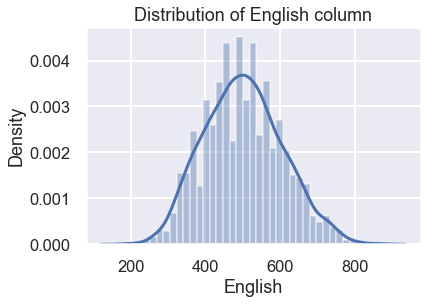

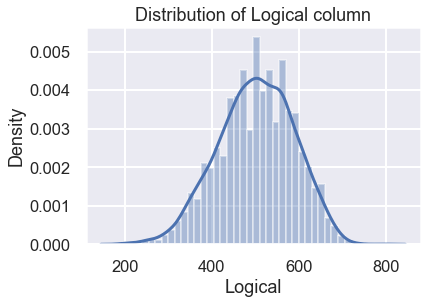

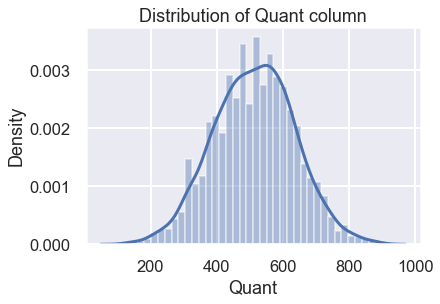

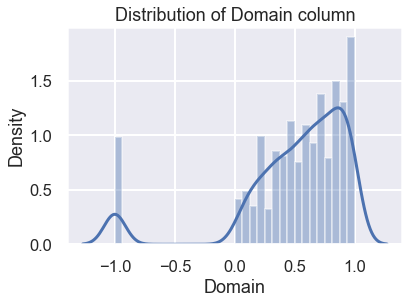

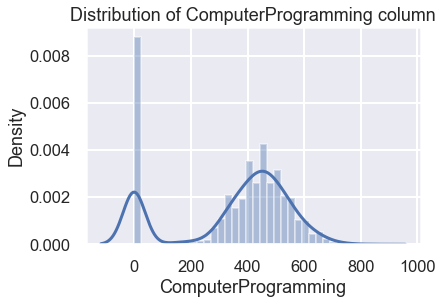

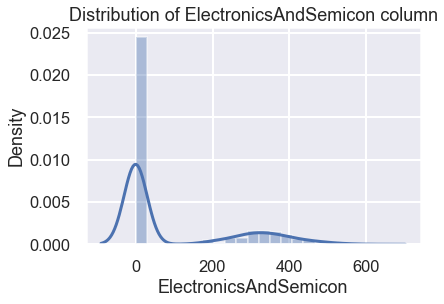

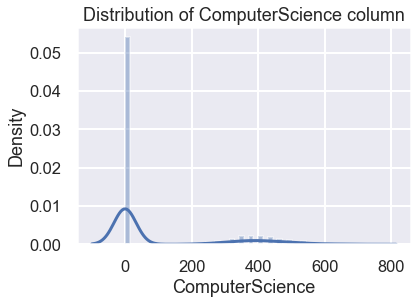

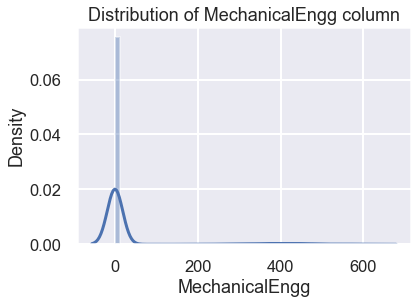

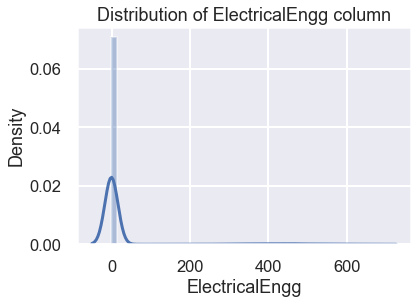

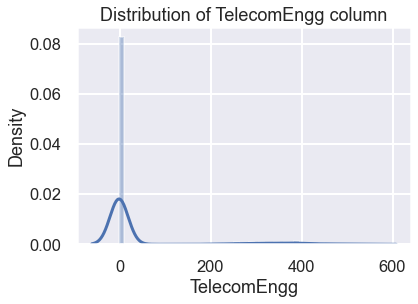

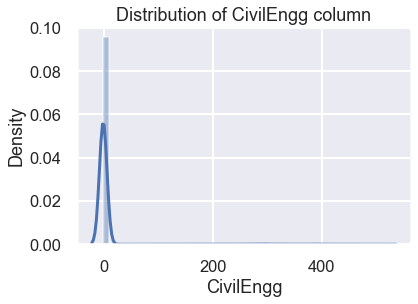

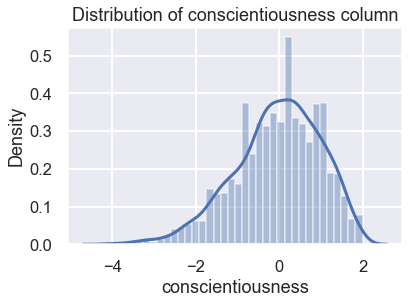

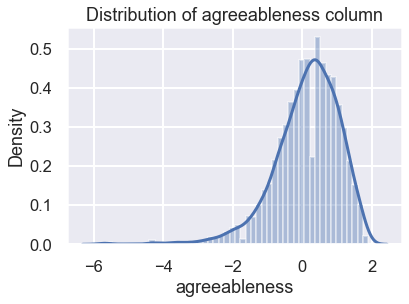

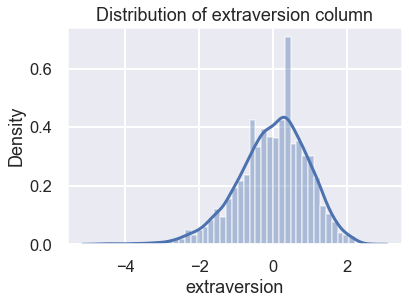

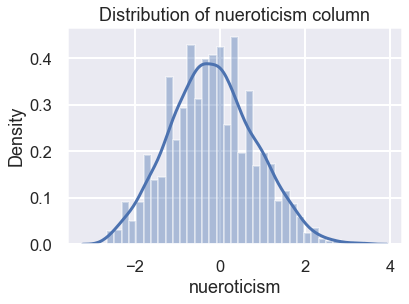

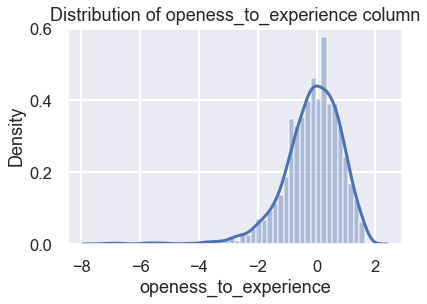

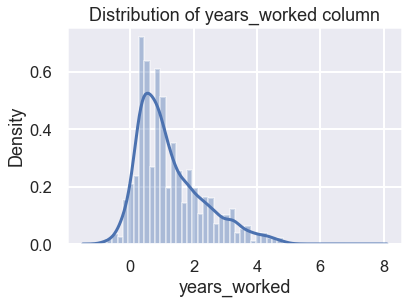

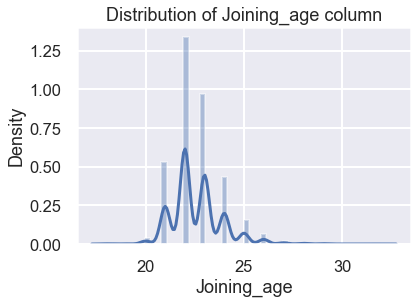

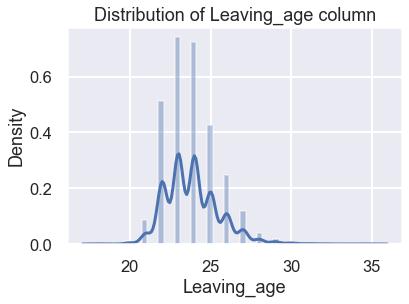

In [ ]:
for col in other_numeric_cols:
    sns.distplot(data_df[col]) # distplot of the numeric columns
    plt.title('Distribution of {} column'.format(col)) # title of the plot
    plt.show()

__Observations:__

* Here we can see that English, Logical, Quant, Nueroticism are normally distributed.
* Years worked column is postively skewed.
* Openess to experience is negatively skewed.

## Bivariate Analysis: 

In [ ]:
data_df.head()

,ID,Salary,Designation,JobCity,Gender,10percentage,10board,12graduation,12percentage,12board,CollegeTier,Degree,Specialization,collegeGPA,CollegeCityTier,CollegeState,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,years_worked,Joining_age,Leaving_age
0,203097,420000,Senior Quality Engineer,Bangalore,Female,84.3,state,2007,95.8,state,2,B.Tech/B.E.,CSE,78.00,0,Andhra Pradesh,2011,515,585,525,0.635979,445,-1,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455,2.6,22,25
1,579905,500000,Assistant Manager,Indore,Male,85.4,cbse,2007,85.0,cbse,2,B.Tech/B.E.,ECE,70.06,0,Madhya Pradesh,2012,695,610,780,0.960603,-1,466,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637,1.3,24,25
2,810601,325000,Systems Engineer,Chennai,Female,85.0,cbse,2010,68.2,cbse,2,B.Tech/B.E.,CSE,70.00,0,Uttar Pradesh,2014,615,545,370,0.450877,395,-1,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721,0.6,22,22
3,267447,1100000,Senior Software Engineer,Gurgaon,Male,85.6,cbse,2007,83.6,cbse,1,B.Tech/B.E.,CSE,74.64,1,Delhi,2011,635,585,625,0.974396,615,-1,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194,3.5,22,25
4,343523,200000,Get,Manesar,Male,78.0,cbse,2008,76.8,cbse,2,B.Tech/B.E.,ECE,73.90,0,Uttar Pradesh,2012,545,625,465,0.124502,-1,233,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295,1.0,23,24


### Designation Vs Salary:

In [ ]:
# Since there are outliers in the salary column we can aggreate it with respect to its median.

salary_per_desig = pd.DataFrame(data_df.groupby('Designation')['Salary'].agg(np.median).sort_values(ascending = False))
salary_per_desig.head(10)

,Salary
Designation,
Junior Manager,1300000
Senior Developer,1110000
Asst. Manager,800000
Research Scientist,730000
Branch Manager,712500
Sales Account Manager,710000
Technology Lead,645000
Business Technology Analyst,625000
General Manager,600000


The problem with the grouped dataframe is that the top paying jobs present in the dataframe occour very less number of times compared to repeated jobs in the dataframe.

So we need a subset of the dataframe where the count of designation is greater than a threshold value.

In [ ]:
designation_count = [] # empty list

for item in data_df['Designation']:
    # checking of count of the designation is greater than 40
    if((data_df['Designation'].value_counts()[item] > 40) & (item not in designation_count)):
        designation_count.append(item) # appending the designation

In [ ]:
len(designation_count)

21

In [ ]:
# checking if the designation are same in both the lists.

assert sorted(list(data_df['Designation'].value_counts()[:21].index)) == sorted(designation_count)

In [ ]:
salary_df = data_df[data_df['Designation'].isin(designation_count)]
salary_df['Designation'].value_counts()

Software Engineer              539
Software Developer             265
System Engineer                205
Programmer Analyst             139
Systems Engineer               118
Java Software Engineer         111
Software Test Engineer         100
Project Engineer                77
Technical Support Engineer      76
Senior Software Engineer        72
Java Developer                  67
Test Engineer                   57
Web Developer                   54
Application Developer           52
Assistant Manager               52
Network Engineer                51
Data Analyst                    49
Business Analyst                49
Engineer                        47
Android Developer               46
Associate Software Engineer     46
Name: Designation, dtype: int64

In [ ]:
grouped_salary = salary_df.groupby('Designation')['Salary'].agg(np.median).reset_index().sort_values(
                                                            by = 'Salary', ascending = False)
grouped_salary.head()

,Designation,Salary
12,Senior Software Engineer,455000
2,Assistant Manager,422500
1,Application Developer,350000
10,Programmer Analyst,335000
16,System Engineer,330000


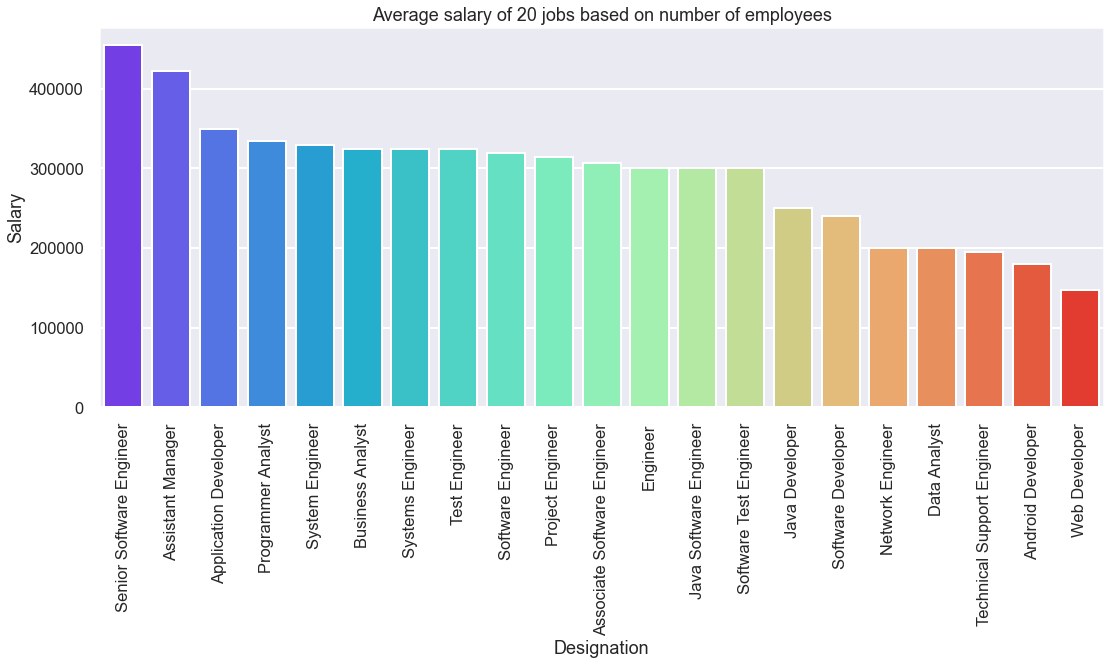

In [ ]:
plt.figure(figsize = (18, 7)) # setting the plot size

# barplot for Designation and Salary
sns.barplot(grouped_salary['Designation'], y = grouped_salary['Salary'], 
            data = grouped_salary, palette = 'rainbow') 

# formatting the tick values
_ = plt.xticks(rotation = 90,
              horizontalalignment = 'center',
              fontweight = 'light')  

plt.title('Average salary of 20 jobs based on number of employees') # title of the plot

plt.show();

__Observations:__

* Here we can see that the senior software engineer, application developer, programmer analyst, system engineer are some of the high paying when joined as a fresher in a company.

### College GPA Vs Salary:

In [ ]:
data_df.head()

,ID,Salary,Designation,JobCity,Gender,10percentage,10board,12graduation,12percentage,12board,CollegeTier,Degree,Specialization,collegeGPA,CollegeCityTier,CollegeState,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,years_worked,Joining_age,Leaving_age
0,203097,420000,Senior Quality Engineer,Bangalore,Female,84.3,state,2007,95.8,state,2,B.Tech/B.E.,CSE,78.00,0,Andhra Pradesh,2011,515,585,525,0.635979,445,-1,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455,2.6,22,25
1,579905,500000,Assistant Manager,Indore,Male,85.4,cbse,2007,85.0,cbse,2,B.Tech/B.E.,ECE,70.06,0,Madhya Pradesh,2012,695,610,780,0.960603,-1,466,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637,1.3,24,25
2,810601,325000,Systems Engineer,Chennai,Female,85.0,cbse,2010,68.2,cbse,2,B.Tech/B.E.,CSE,70.00,0,Uttar Pradesh,2014,615,545,370,0.450877,395,-1,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721,0.6,22,22
3,267447,1100000,Senior Software Engineer,Gurgaon,Male,85.6,cbse,2007,83.6,cbse,1,B.Tech/B.E.,CSE,74.64,1,Delhi,2011,635,585,625,0.974396,615,-1,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194,3.5,22,25
4,343523,200000,Get,Manesar,Male,78.0,cbse,2008,76.8,cbse,2,B.Tech/B.E.,ECE,73.90,0,Uttar Pradesh,2012,545,625,465,0.124502,-1,233,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295,1.0,23,24


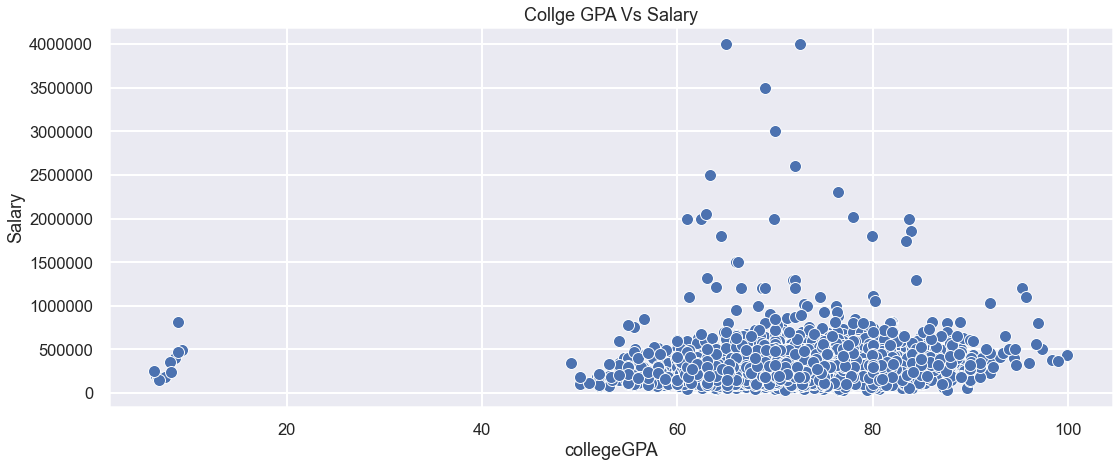

In [ ]:
plt.figure(figsize = (18, 7)) # setting the plot size

# scatter plot
sns.scatterplot(data_df['collegeGPA'], data_df['Salary'], 
                data = data_df)

plt.title('Collge GPA Vs Salary') # setting the title

plt.ticklabel_format(style = 'plain', axis ='y') # printiing the y-label normally

plt.show();

__Observations:__

* Here we can see that students having GPA between 60 and 80 tend to have a higer salary compared to students having GPA more than 80.

### Computer Programmig Vs Salary 

In [ ]:
data_df.head(2)

,ID,Salary,Designation,JobCity,Gender,10percentage,10board,12graduation,12percentage,12board,CollegeTier,Degree,Specialization,collegeGPA,CollegeCityTier,CollegeState,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,years_worked,Joining_age,Leaving_age
0,203097,420000,Senior Quality Engineer,Bangalore,Female,84.3,state,2007,95.8,state,2,B.Tech/B.E.,CSE,78.00,0,Andhra Pradesh,2011,515,585,525,0.635979,445,-1,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.3549,-0.4455,2.6,22,25
1,579905,500000,Assistant Manager,Indore,Male,85.4,cbse,2007,85.0,cbse,2,B.Tech/B.E.,ECE,70.06,0,Madhya Pradesh,2012,695,610,780,0.960603,-1,466,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.1076,0.8637,1.3,24,25


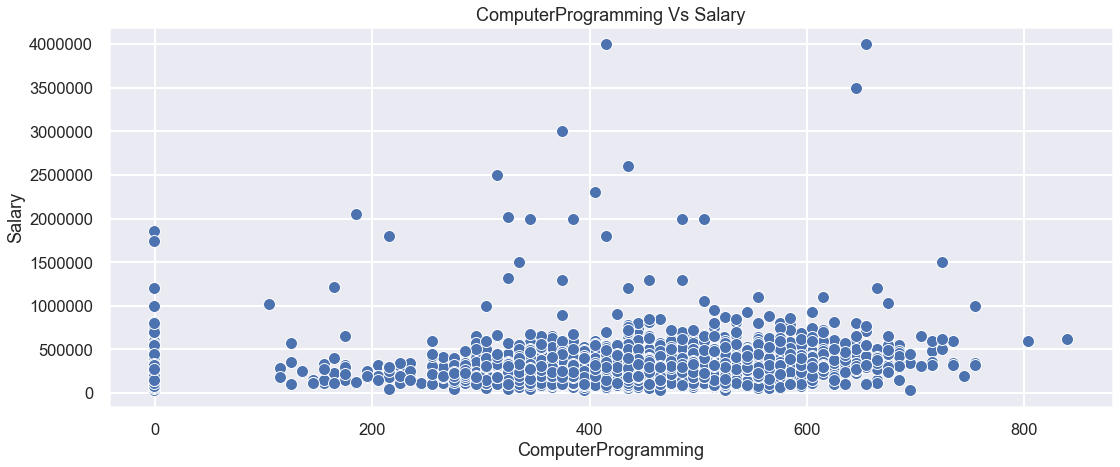

In [ ]:
plt.figure(figsize = (18, 7)) # setting the plot size

# scatter plot
sns.scatterplot(data_df['ComputerProgramming'], data_df['Salary'], 
                data = data_df)

plt.title('ComputerProgramming Vs Salary') # setting the title

plt.ticklabel_format(style = 'plain', axis ='y') # printiing the y-label normally

plt.show();

__Observations:__

* Here we can see that majority of the student despite their score have a salary to about 5 LPA to 7 LPA.

### Job City Vs Salary.

In [ ]:
data_df['JobCity'].value_counts()[:40]

Bangalore             684
Unknown               461
Noida                 388
Hyderabad             368
Pune                  327
Chennai               313
New Delhi             225
Gurgaon               217
Kolkata               119
Mumbai                119
Jaipur                 52
Lucknow                41
Mysore                 40
Navi Mumbai            34
Greater Noida          29
Chandigarh             28
Bhubaneswar            27
Indore                 25
Coimbatore             21
Ahmedabad              19
Bhopal                 19
Faridabad              18
Ghaziabad              16
Mohali                 13
Kochi/Cochin           13
Dehradun               11
Mangalore              11
Nagpur                 11
Trivandrum             10
Kanpur                  9
Bhubaneshwar            9
Thiruvananthapuram      7
Thane                   7
Jabalpur                7
Patna                   7
Visakhapatnam           7
Pondicherry             6
Trichy                  5
Raipur      

In [ ]:
data_df.groupby('JobCity')['Salary'].agg(np.mean).reset_index().sort_values(
                                                            by = 'Salary', ascending = False).head(15)

,JobCity,Salary
111,"Kalmar, Sweden",2.300000e+06
128,London,2.000000e+06
106,Johannesburg,1.745000e+06
10,Angul,1.300000e+06
132,Maharajganj,1.200000e+06
60,Dubai,1.140000e+06
143,Muzaffarpur,1.000000e+06
61,Durgapur,8.500000e+05
52,Dammam,7.750000e+05
164,Panchkula,7.333333e+05


In [ ]:
job_city_count = [] # empty list

for item in data_df['JobCity']:
    # checking of count of the job city is greater than 20
    if((data_df['JobCity'].value_counts()[item] >= 20) & (item not in job_city_count)):
        job_city_count.append(item) # appending the designation

In [ ]:
len(job_city_count)

19

In [ ]:
# checking if the Cities are same in both the lists.

assert sorted(list(data_df['JobCity'].value_counts()[:19].index)) == sorted(job_city_count)

In [ ]:
city_df = data_df[data_df['JobCity'].isin(job_city_count)] # extracting the subset of the dataframe
city_df['JobCity'].value_counts()

Bangalore        684
Unknown          461
Noida            388
Hyderabad        368
Pune             327
Chennai          313
New Delhi        225
Gurgaon          217
Kolkata          119
Mumbai           119
Jaipur            52
Lucknow           41
Mysore            40
Navi Mumbai       34
Greater Noida     29
Chandigarh        28
Bhubaneswar       27
Indore            25
Coimbatore        21
Name: JobCity, dtype: int64

In [ ]:
salary_and_city = city_df.groupby('JobCity')['Salary'].agg(np.median).reset_index().sort_values(
                                                            by = 'Salary', ascending = False)
salary_and_city.head()

,JobCity,Salary
12,Mumbai,340000
0,Bangalore,325000
2,Chandigarh,325000
17,Pune,325000
14,Navi Mumbai,317500


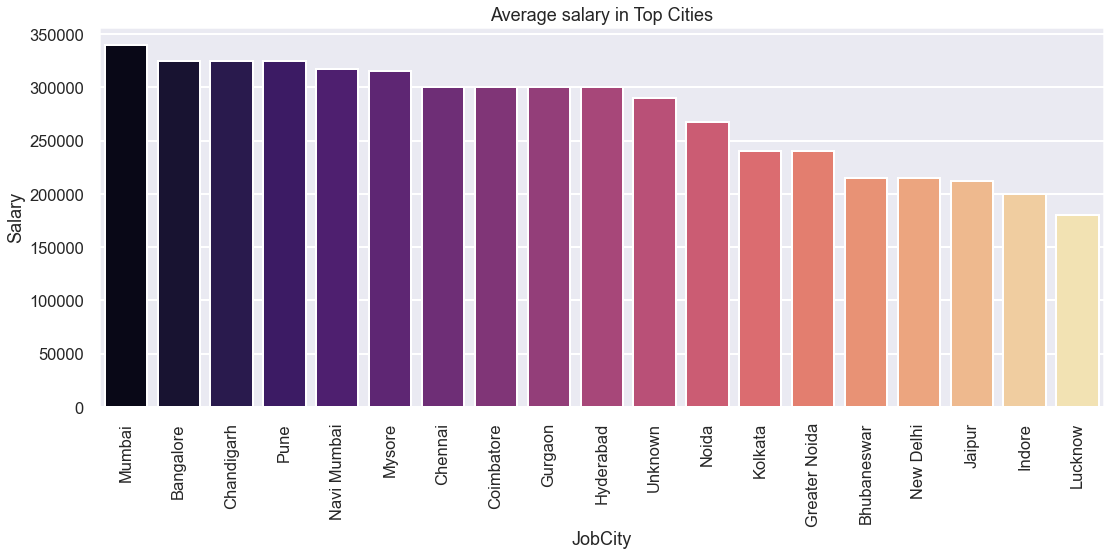

In [ ]:
plt.figure(figsize = (18, 7)) # setting the plot size

# barplot for Designation and Salary
sns.barplot(salary_and_city['JobCity'], y = salary_and_city['Salary'], 
            data = salary_and_city, palette = 'magma') 

# formatting the tick values
_ = plt.xticks(rotation = 90,
              horizontalalignment = 'center',
              fontweight = 'light')  

plt.title('Average salary in Top Cities') # title of the plot
plt.show();

__Observation__:

* From the plot we can see that Mumbai, Bangalore, Chandigarh, Pune etc are some of the cities proving a good salary to engineers.

###  Gender Vs CollegeGPA:

In [ ]:
data_df.head(2)

,ID,Salary,Designation,JobCity,Gender,10percentage,10board,12graduation,12percentage,12board,CollegeTier,Degree,Specialization,collegeGPA,CollegeCityTier,CollegeState,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,years_worked,Joining_age,Leaving_age
0,203097,420000,Senior Quality Engineer,Bangalore,Female,84.3,state,2007,95.8,state,2,B.Tech/B.E.,CSE,78.00,0,Andhra Pradesh,2011,515,585,525,0.635979,445,-1,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.3549,-0.4455,2.6,22,25
1,579905,500000,Assistant Manager,Indore,Male,85.4,cbse,2007,85.0,cbse,2,B.Tech/B.E.,ECE,70.06,0,Madhya Pradesh,2012,695,610,780,0.960603,-1,466,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.1076,0.8637,1.3,24,25


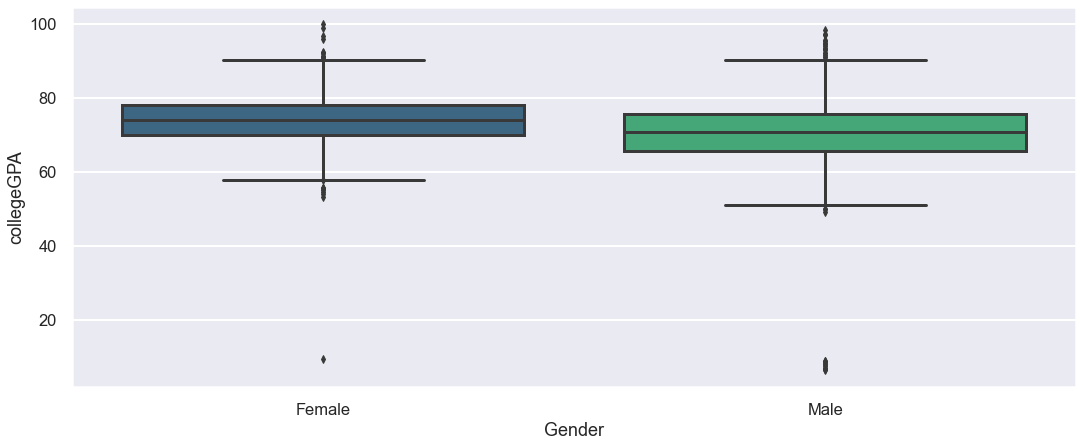

In [ ]:
plt.figure(figsize =(18, 7))

sns.boxplot(data_df['Gender'], data_df['collegeGPA'], palette = 'viridis')

plt.show()

In [ ]:
data_df.groupby('Gender')['collegeGPA'].describe()

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
Female,956.0,74.052573,7.269195,9.30,70.0000,74.000,78.1575,99.93
Male,3040.0,70.678197,8.270149,6.45,65.6275,70.655,75.6925,98.40


__Observations:__

* From the dataset we can see that Male graduates are getting IT jobs more than Female graduate, which is not the case in real life.

* The mean and median of the CollegeGPA with respect to Gender are equal but they are not normally distributed.

* Female student's are having a better GPA than Male student's.

## Research Questions:

### Relationship b/w Gender and Specialization:

In [ ]:
gen_specialization = data_df.groupby(['Gender', 'Specialization']).apply(lambda x:x['Specialization'].count()).reset_index(name = 'Count')
gen_specialization

,Gender,Specialization,Count
0,Female,CIV,6
1,Female,CSE,602
2,Female,ECE,312
3,Female,MECH,21
4,Female,Other,15
5,Male,CIV,23
6,Male,CSE,1684
7,Male,ECE,1066
8,Male,MECH,221
9,Male,Other,46


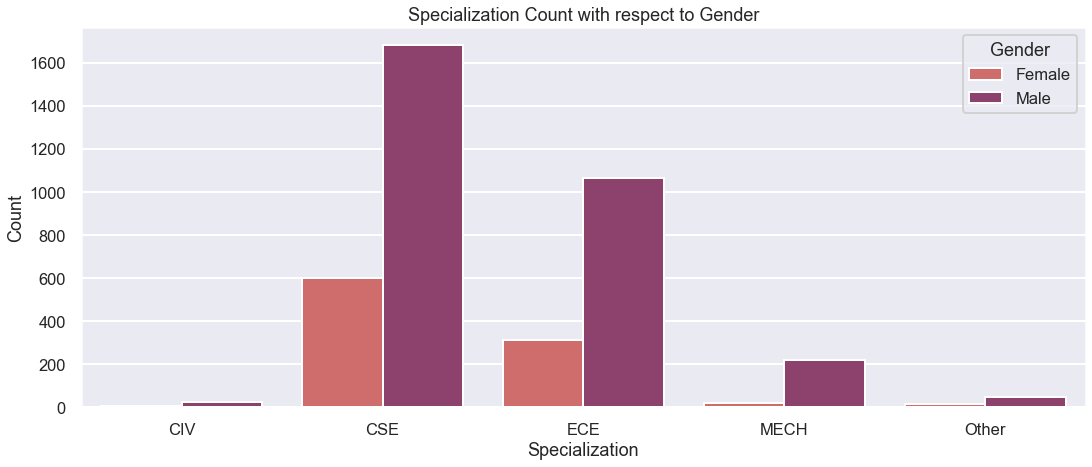

In [ ]:
plt.figure(figsize = (18, 7))

sns.barplot(gen_specialization['Specialization'], gen_specialization['Count'],
            hue = gen_specialization['Gender'], palette = 'flare')

plt.title('Specialization Count with respect to Gender')
plt.show()

__Observations:__

* Here we can see that department's related to Mechanical Engineering have a higher number of Male students compared to Female students, which is also true in real life.

* For other departments there might be a bias as there are more male students than female students.

### CollegeCityTier Vs CollegeTier Vs Salary:

In [ ]:
data_df.head(2)

,ID,Salary,Designation,JobCity,Gender,10percentage,10board,12graduation,12percentage,12board,CollegeTier,Degree,Specialization,collegeGPA,CollegeCityTier,CollegeState,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,years_worked,Joining_age,Leaving_age
0,203097,420000,Senior Quality Engineer,Bangalore,Female,84.3,state,2007,95.8,state,2,B.Tech/B.E.,CSE,78.00,0,Andhra Pradesh,2011,515,585,525,0.635979,445,-1,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.3549,-0.4455,2.6,22,25
1,579905,500000,Assistant Manager,Indore,Male,85.4,cbse,2007,85.0,cbse,2,B.Tech/B.E.,ECE,70.06,0,Madhya Pradesh,2012,695,610,780,0.960603,-1,466,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.1076,0.8637,1.3,24,25


In [ ]:
col_city_tier = data_df.groupby(['CollegeCityTier', 'CollegeTier']).apply(lambda x:x['Salary'].median()).reset_index(
                                                                                    name = 'Salary')
col_city_tier

,CollegeCityTier,CollegeTier,Salary
0,0,1,400000.0
1,0,2,290000.0
2,1,1,350000.0
3,1,2,300000.0


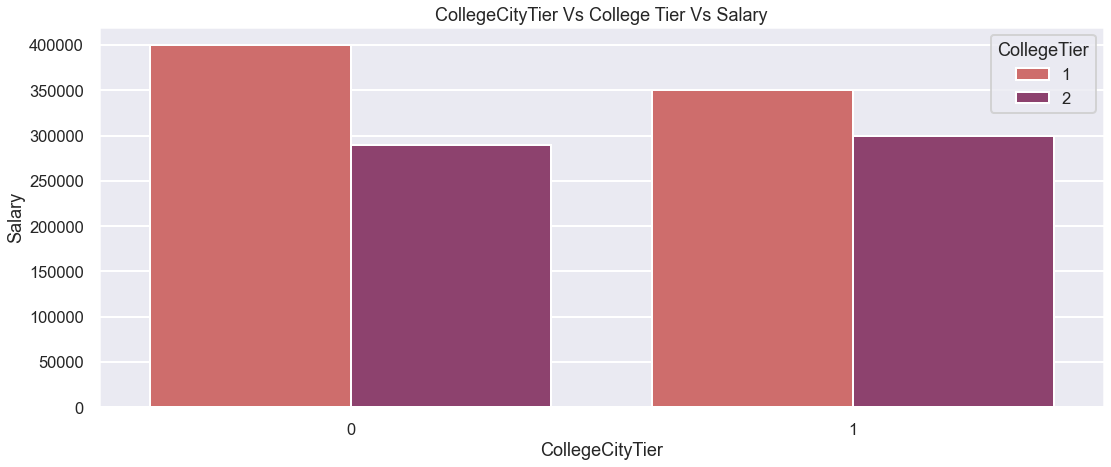

In [ ]:
plt.figure(figsize = (18, 7)) # setting the figure size

# barplot
sns.barplot(col_city_tier['CollegeCityTier'], col_city_tier['Salary'],
            hue = col_city_tier['CollegeTier'], palette = 'flare')

plt.title('CollegeCityTier Vs College Tier Vs Salary') # title of the plot

plt.show()

__Observation:__

* From the plot we can see that better city and college Tier means a better salary.

### Specialization Vs College Tier Vs Salary 

In [ ]:
data_df.head(2)

,ID,Salary,Designation,JobCity,Gender,10percentage,10board,12graduation,12percentage,12board,CollegeTier,Degree,Specialization,collegeGPA,CollegeCityTier,CollegeState,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,years_worked,Joining_age,Leaving_age
0,203097,420000,Senior Quality Engineer,Bangalore,Female,84.3,state,2007,95.8,state,2,B.Tech/B.E.,CSE,78.00,0,Andhra Pradesh,2011,515,585,525,0.635979,445,-1,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.3549,-0.4455,2.6,22,25
1,579905,500000,Assistant Manager,Indore,Male,85.4,cbse,2007,85.0,cbse,2,B.Tech/B.E.,ECE,70.06,0,Madhya Pradesh,2012,695,610,780,0.960603,-1,466,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.1076,0.8637,1.3,24,25


In [ ]:
clg_tier_sal = data_df.groupby(['Specialization', 'CollegeTier']).apply(lambda x:x['Salary'].median()).reset_index(
                                                                                name = 'Salary')
clg_tier_sal.head()

,Specialization,CollegeTier,Salary
0,CIV,1,507500.0
1,CIV,2,300000.0
2,CSE,1,350000.0
3,CSE,2,300000.0
4,ECE,1,332500.0


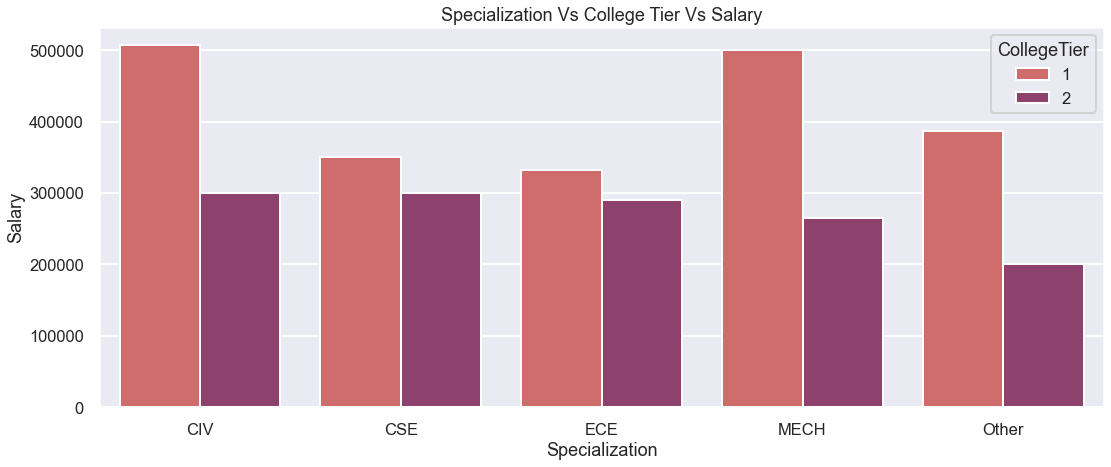

In [ ]:
plt.figure(figsize = (18, 7)) # setting the figure size

# barplot
sns.barplot(clg_tier_sal['Specialization'], clg_tier_sal['Salary'],
            hue = clg_tier_sal['CollegeTier'], palette = 'flare')

plt.title('Specialization Vs College Tier Vs Salary') # title of the plot

plt.show()

__Observations:__

* Here we can see that student's graduated from Tier 1 colleges are getting a salary compared to Tier 2 colleges.
* We can see that CSE and ECE are getting a lower salary than other which is unusual. This is might be because the way the specialization was mapped earlier.

## Conclusion:

* Initially the dataset had 3998 rows and columns 39.
* Most of the salary values are concentrated below the range of 90000.
* Nearly 44% of the data in salary can be considered as outliers in the dataset.
* Nearly 80% of the values in the collegeGPA are present between 65 and 85.
* Departments related to Computer Science and Electrical have a combined 92% of the total specializations.
* Majority of the students have completed their scool education either through state board or cbse.
* Age of 22 there are more number of joinings in IT company.
* From the age of 23 the number of employees leaving their jobs is gradually reducing.
* There are higher number of jobs in Southern part of India compared to Northern Part of India.
* Senior Software Engineer, Application Developer, Programmer Analyst, System Engineer are some of the high paying when joined as a fresher in a company.
* Students having GPA between 60 and 85 tend to have a higer salary compared to students having GPA more than 85.
* Majority of the student despite their programming knowledge have a salary to about 5 LPA to 7 LPA.
* Mumbai, Bangalore, Chandigarh, Pune etc are some of the cities proving a good salary to engineers.
* Female student's are having a better GPA than Male student's.
* Mechanical Engineering have a higher number of Male students compared to Female students, which is also true in real life.
* Better city and college Tier means a better salary.
* Student's graduated from Tier 1 colleges are getting a salary compared to Tier 2 colleges.

## Feature Transformation 

### Catrgorical Features 

In [ ]:
# since there are only 2 values in the Gender column
# we can map them in binary
# Female --> 0
# Male --> 1

data_df['Gender'] = data_df['Gender'].map({'Female' : 0,
                                          'Male' : 1}) 

In [ ]:
categorical_cols = data_df.select_dtypes(include = 'object').columns # getting the column names of type object 
categorical_cols

Index(['Designation', 'JobCity', '10board', '12board', 'Degree',
       'Specialization', 'CollegeState'],
      dtype='object')

In [ ]:
# creating dummy variables for the cateforical features 

dummy_df = pd.get_dummies(data_df[categorical_cols], drop_first = True) 
dummy_df

,Designation_.Net Developer,Designation_.Net Web Developer,Designation_Account Executive,Designation_Account Manager,Designation_Admin Assistant,Designation_Administrative Coordinator,Designation_Administrative Support,Designation_Aircraft Technician,Designation_Android Developer,Designation_Application Developer,Designation_Application Engineer,Designation_Apprentice,Designation_Ase,Designation_Asp.Net Developer,Designation_Assistant Administrator,Designation_Assistant Electrical Engineer,Designation_Assistant Engineer,Designation_Assistant Manager,Designation_Assistant Professor,Designation_Assistant Programmer,Designation_Assistant Software Engineer,Designation_Assistant Store Manager,Designation_Assistant System Engineer,Designation_Assistant System Engineer - Trainee,Designation_Assistant System Engineer Trainee,Designation_Assistant Systems Engineer,Designation_Associate Developer,Designation_Associate Engineer,Designation_Associate Manager,Designation_Associate Qa,Designation_Associate Software Developer,Designation_Associate Software Engg,Designation_Associate Software Engineer,Designation_Associate System Engineer,Designation_Associate Technical Operations,Designation_Associate Test Engineer,Designation_Asst. Manager,Designation_Automation Engineer,Designation_Branch Manager,Designation_Bss Engineer,Designation_Business Analyst,Designation_Business Analyst Consultant,Designation_Business Consultant,Designation_Business Development Executive,Designation_Business Development Manager,Designation_Business Development Managerde,Designation_Business Intelligence Analyst,Designation_Business Office Manager,Designation_Business Process Analyst,Designation_Business System Analyst,Designation_Business Systems Analyst,Designation_Business Systems Consultant,Designation_Business Technology Analyst,Designation_C# Developer,Designation_Cad Designer,Designation_Cad Drafter,Designation_Catalog Associate,Designation_Civil Engineer,Designation_Clerical,Designation_Clerical Assistant,Designation_Client Services Associate,Designation_Cloud Engineer,Designation_Cnc Programmer,Designation_Co Faculty,Designation_Computer Faculty,Designation_Continuous Improvement Engineer,Designation_Controls Engineer,Designation_Corporate Recruiter,Designation_Customer Care Executive,Designation_Customer Service,Designation_Customer Service Manager,Designation_Customer Service Representative,Designation_Customer Support Engineer,Designation_Data Analyst,Designation_Data Entry Operator,Designation_Data Scientist,Designation_Database Administrator,Designation_Database Developer,Designation_Db2 Dba,Designation_Dba,Designation_Dcs Engineer,Designation_Delivery Software Engineer,Designation_Design Engineer,Designation_Designer,Designation_Desktop Support Analyst,Designation_Desktop Support Engineer,Designation_Desktop Support Technician,Designation_Developer,Designation_Digital Marketing Specialist,Designation_Documentation Specialist,Designation_Dotnet Developer,Designation_Editor,Designation_Educator,Designation_Electrical Controls Engineer,Designation_Electrical Design Engineer,Designation_Electrical Designer,Designation_Electrical Engineer,Designation_Electrical Field Engineer,Designation_Electrical Project Engineer,Designation_Electronic Field Service Engineer,Designation_Embedded Engineer,Designation_Embedded Software Engineer,Designation_Engineer,Designation_Engineer Trainee,Designation_Engineer- Customer Support,Designation_Engineer-Hws,Designation_Engineering Manager,Designation_Engineering Technician,Designation_Enterprise Solutions Developer,Designation_Entry Level Management Trainee,Designation_Entry Level Sales And Marketing,Designation_Environmental Engineer,Designation_Etl Developer,Designation_Executive Administrative Assistant,Designation_Executive Assistant,Designation_Executive Engg,Designation_Executive Engineer,Designation_Executive Hr,Designation_Executive Recruiter,Designation_Faculty,Designation_Field Based Employee Relations Manager,Des

In [ ]:
data_df.drop(categorical_cols, axis = 1,inplace = True) # dropping the categorical features from the dataframe

### Numeric Features

In [ ]:
numeric_cols = data_df.select_dtypes(exclude = 'object').columns # getting the column names of type numeric 
numeric_cols

Index(['ID', 'Salary', 'Gender', '10percentage', '12graduation',
       '12percentage', 'CollegeTier', 'collegeGPA', 'CollegeCityTier',
       'GraduationYear', 'English', 'Logical', 'Quant', 'Domain',
       'ComputerProgramming', 'ElectronicsAndSemicon', 'ComputerScience',
       'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg', 'CivilEngg',
       'conscientiousness', 'agreeableness', 'extraversion', 'nueroticism',
       'openess_to_experience', 'years_worked', 'Joining_age', 'Leaving_age'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import StandardScaler # for scaling the numeric features

In [ ]:
scaler = StandardScaler() # initializing the object for scaling

In [ ]:
data_df[numeric_cols] = scaler.fit_transform(data_df[numeric_cols]) # scaling the numeric features
data_df

,ID,Salary,Gender,10percentage,12graduation,12percentage,CollegeTier,collegeGPA,CollegeCityTier,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,years_worked,Joining_age,Leaving_age
0,-1.268158,0.528367,-1.783232,0.647100,-0.657435,1.939269,0.283358,0.797566,-0.655122,-0.034685,0.127144,0.961263,0.095231,0.267885,0.447803,-0.609029,-0.523658,-0.244428,-0.199639,-0.313433,-0.100529,0.983040,0.707307,0.550542,1.512747,-0.306065,1.278225,-0.465111,0.702401
1,-0.230785,0.904470,0.560780,0.758770,-0.657435,0.957561,0.283358,-0.174520,-0.655122,-0.003299,1.842397,1.249323,2.180545,0.960540,-1.724115,2.342066,-0.523658,-0.244428,-0.199639,-0.313433,-0.100529,-0.677236,0.245979,1.299912,0.061222,0.993734,0.046817,1.100672,0.702401
2,0.404334,0.081744,-1.783232,0.718163,1.156867,-0.569540,0.283358,-0.181866,-0.655122,0.059473,1.080062,0.500366,-1.172313,-0.127069,0.204315,-0.609029,-0.523658,-0.244428,-0.199639,-0.313433,-0.100529,0.300433,1.662180,0.168655,-0.693669,0.803510,-0.616249,-0.465111,-1.122958
3,-1.090999,3.725245,0.560780,0.779074,-0.657435,0.830302,-3.529100,0.386205,1.526434,-0.034685,1.270646,0.961263,0.913001,0.989970,1.275664,-0.609029,-0.523658,-0.244428,-0.199639,-0.313433,-0.100529,0.081228,0.209723,-0.365167,-0.236725,-0.776563,2.130738,-0.465111,0.702401
4,-0.881558,-0.505917,0.560780,0.007532,-0.052667,0.212190,0.283358,0.295607,-0.655122,-0.003299,0.413019,1.422160,-0.395432,-0.823458,-1.724115,0.869678,-0.523658,-0.244428,-0.199639,-0.313433,-0.100529,-0.820682,-0.453829,-1.128205,0.258957,0.007666,-0.237354,0.317780,0.093948
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3993,-1.695380,-0.129814,0.560780,-2.622817,-1.262202,-1.723956,0.283358,-1.222512,-0.655122,-0.066071,-1.302233,-1.930865,-0.313655,-0.500104,-0.039174,-0.609029,-0.523658,-0.244428,-0.199639,-0.313433,-0.100529,-0.069123,0.209723,0.245306,0.812938,-0.776563,-0.237354,1.100672,0.702401
3994,0.245152,-0.976046,-1.783232,1.225756,0.552100,1.684752,0.283358,0.711866,1.526434,0.028087,-0.825774,-1.055161,0.177008,0.792013,-0.136569,2.051380,-0.523658,-0.244428,-0.199639,-0.313433,-0.100529,-0.258277,0.777054,0.976696,0.941963,0.042613,-1.184591,-1.248003,-1.731411
3995,-0.847516,0.058238,0.560780,0.399394,-0.052667,-0.814967,0.283358,-0.181866,-0.655122,-0.003299,-0.254023,-0.306203,-0.395432,-0.047116,0.253012,-0.609029,-0.523658,-0.244428,-0.199639,-0.313433,-0.100529,-1.497065,-1.780720,-1.586007,-1.140491,-0.619797,0.236264,-0.465111,0.093948
3996,0.780153,-0.505917,-1.783232,0.080626,1.156867,-0.416830,0.283358,-0.130446,1.526434,0.059473,-0.492253,-1.055161,-1.581199,0.499990,0.447803,-0.609029,1.980864,-0.244428,-0.199639,-0.313433,-0.100529,-0.118526,-0.108072,-0.477777,-0.190474,0.042613,-0.710973,-0.465111,-0.514505


In [ ]:
final_df = pd.concat([data_df, dummy_df], axis = 1) # concatenating the transformed features 
final_df.head()

,ID,Salary,Gender,10percentage,12graduation,12percentage,CollegeTier,collegeGPA,CollegeCityTier,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,years_worked,Joining_age,Leaving_age,Designation_.Net Developer,Designation_.Net Web Developer,Designation_Account Executive,Designation_Account Manager,Designation_Admin Assistant,Designation_Administrative Coordinator,Designation_Administrative Support,Designation_Aircraft Technician,Designation_Android Developer,Designation_Application Developer,Designation_Application Engineer,Designation_Apprentice,Designation_Ase,Designation_Asp.Net Developer,Designation_Assistant Administrator,Designation_Assistant Electrical Engineer,Designation_Assistant Engineer,Designation_Assistant Manager,Designation_Assistant Professor,Designation_Assistant Programmer,Designation_Assistant Software Engineer,Designation_Assistant Store Manager,Designation_Assistant System Engineer,Designation_Assistant System Engineer - Trainee,Designation_Assistant System Engineer Trainee,Designation_Assistant Systems Engineer,Designation_Associate Developer,Designation_Associate Engineer,Designation_Associate Manager,Designation_Associate Qa,Designation_Associate Software Developer,Designation_Associate Software Engg,Designation_Associate Software Engineer,Designation_Associate System Engineer,Designation_Associate Technical Operations,Designation_Associate Test Engineer,Designation_Asst. Manager,Designation_Automation Engineer,Designation_Branch Manager,Designation_Bss Engineer,Designation_Business Analyst,Designation_Business Analyst Consultant,Designation_Business Consultant,Designation_Business Development Executive,Designation_Business Development Manager,Designation_Business Development Managerde,Designation_Business Intelligence Analyst,Designation_Business Office Manager,Designation_Business Process Analyst,Designation_Business System Analyst,Designation_Business Systems Analyst,Designation_Business Systems Consultant,Designation_Business Technology Analyst,Designation_C# Developer,Designation_Cad Designer,Designation_Cad Drafter,Designation_Catalog Associate,Designation_Civil Engineer,Designation_Clerical,Designation_Clerical Assistant,Designation_Client Services Associate,Designation_Cloud Engineer,Designation_Cnc Programmer,Designation_Co Faculty,Designation_Computer Faculty,Designation_Continuous Improvement Engineer,Designation_Controls Engineer,Designation_Corporate Recruiter,Designation_Customer Care Executive,Designation_Customer Service,Designation_Customer Service Manager,Designation_Customer Service Representative,Designation_Customer Support Engineer,Designation_Data Analyst,Designation_Data Entry Operator,Designation_Data Scientist,Designation_Database Administrator,Designation_Database Developer,Designation_Db2 Dba,Designation_Dba,Designation_Dcs Engineer,Designation_Delivery Software Engineer,Designation_Design Engineer,Designation_Designer,Designation_Desktop Support Analyst,Designation_Desktop Support Engineer,Designation_Desktop Support Technician,Designation_Developer,Designation_Digital Marketing Specialist,Designation_Documentation Specialist,Designation_Dotnet Developer,Designation_Editor,Designation_Educator,Designation_Electrical Controls Engineer,Designation_Electrical Design Engineer,Designation_Electrical Designer,Designation_Electrical Engineer,Designation_Electrical Field Engineer,Designation_Electrical Project Engineer,Designation_Electronic Field Service Engineer,Designation_Embedded Engineer,Designation_Embedded Software Engineer,Designation_Engineer,Designation_Engineer Trainee,Designation_Engineer- Customer Support,Designation_Engineer-Hws,Designation_Engineering Manager,Designation_Engineering Technician,Designation_Enterprise Solutions Developer,Designation_Entry Level Management Trainee,Designat